In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='left')
imdb_joined['title'] = imdb_joined['primary_title']
imdb_joined['year'] = imdb_joined['start_year']
tn_movie_budgets['title'] = tn_movie_budgets['movie']
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].map(lambda x:x[-4:]).astype(int)

df = pd.merge(tn_movie_budgets, imdb_joined, on =["title", "year"], how ='left')

df['production_budget'] = df['production_budget'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['domestic_gross'] = df['domestic_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year_month'] = df['release_date'].dt.to_period("M")

df = df.drop_duplicates(['title'])
df.drop(['id', 'movie', 'tconst', 'primary_title', 'original_title', 'start_year'], axis = 1, inplace = True)

df = df[~df['runtime_minutes'].isna()]
df = df[~df['genres'].isna()]
df = df[~df['averagerating'].isna()]
df = df[~df['numvotes'].isna()]

df.drop(df.index[df['domestic_gross'] == 0], inplace = True)
df.drop(df.index[df['worldwide_gross'] == 0], inplace = True)

df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['worldwide_profit'] = df['worldwide_gross'] - df['production_budget']

df = df[['title', 'genres', 'runtime_minutes',\
        'year', 'release_year_month', 'release_date', 'averagerating',\
        'numvotes', 'production_budget', 'domestic_gross', 'domestic_profit',\
         'worldwide_gross', 'worldwide_profit']]

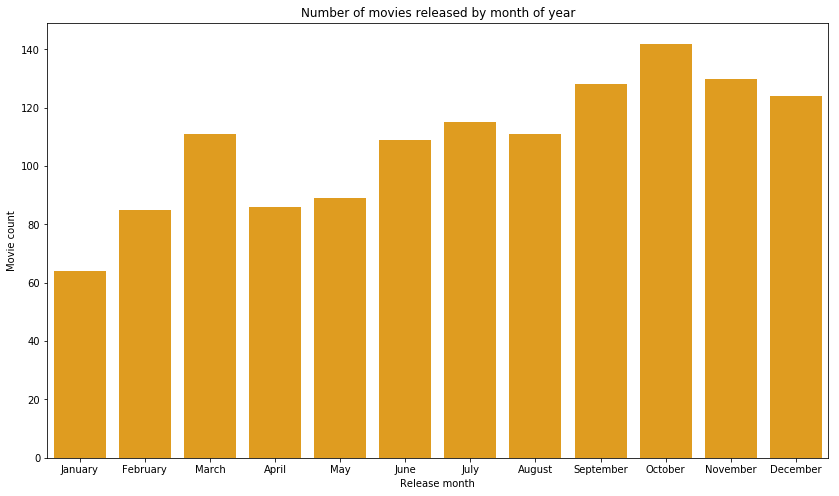

<Figure size 432x288 with 0 Axes>

In [3]:
# Movie counts by release month of a year
df['release_month'] = df['release_date'].dt.month
df['release_month_str']=df.release_date.dt.strftime("%B")

fig31 = plt.figure(figsize=(14, 8))
plt.plot()

movie_by_month = df.groupby(['release_month','release_month_str']).title.count().reset_index()
sns.barplot('release_month_str','title', data= movie_by_month, color = 'orange')

plt.title('Number of movies released by month of year')
plt.xlabel('Release month')
plt.ylabel('Movie count')
plt.show()

fig31.savefig("movie count by release month.png")
plt.clf()

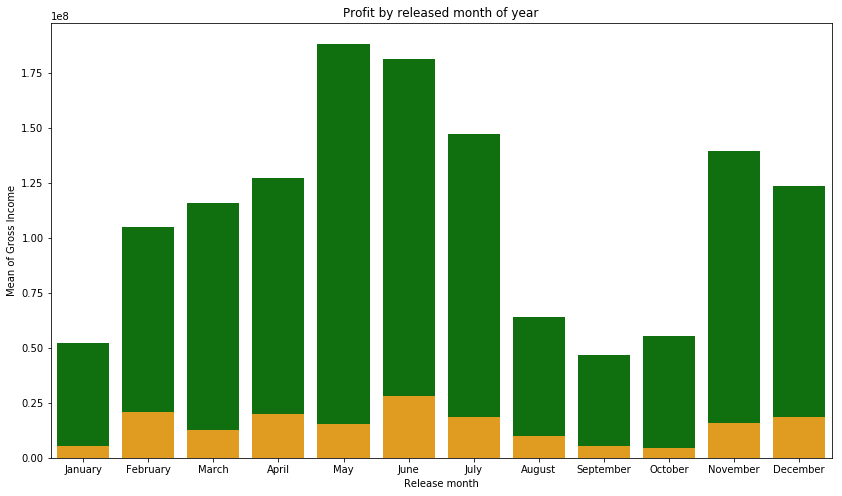

<Figure size 432x288 with 0 Axes>

In [4]:
# Profit by release month of a year
fig32 = plt.figure(figsize=(14, 8))
plt.plot()

worldwide_profit_by_month = df.groupby(['release_month','release_month_str']).worldwide_profit.mean().reset_index()
sns.barplot('release_month_str','worldwide_profit', data= worldwide_profit_by_month, color = 'green')
domestic_profit_by_month = df.groupby(['release_month','release_month_str']).domestic_profit.mean().reset_index()
sns.barplot('release_month_str','domestic_profit', data= domestic_profit_by_month, color = 'orange')

plt.title('Profit by released month of year')
plt.xlabel('Release month')
plt.ylabel('Mean of Gross Income')
plt.show()

fig32.savefig("movie profit by release month.png")
plt.clf()